<a href="https://colab.research.google.com/github/hmh100298/CMND/blob/main/cropper_detect4box.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#replace 
!git clone https://github.com/hmh100298/CMND.git

Cloning into 'CMND'...
remote: Enumerating objects: 571, done.
remote: Counting objects: 100% (571/571), done.
remote: Compressing objects: 100% (239/239), done.
remote: Total 571 (delta 358), reused 531 (delta 324), pack-reused 0
Receiving objects: 100% (571/571), 33.86 MiB | 27.87 MiB/s, done.
Resolving deltas: 100% (358/358), done.


In [2]:
# chia thu muc test , train
!python /content/CMND/partion_dataset.py -i /content/CMND/Dataset -x -r 0.1


In [3]:
!pip install tensorflow-object-detection-api
# install tf object detection

     |████████████████████████████████| 577 kB 7.7 MB/s 
     |████████████████████████████████| 54 kB 3.5 MB/s 
     |████████████████████████████████| 54 kB 3.8 MB/s 
     |████████████████████████████████| 3.2 MB 48.0 MB/s 
  Created wheel for tensorflow-object-detection-api: filename=tensorflow_object_detection_api-0.1.1-py3-none-any.whl size=844512 sha256=8e61b6d1351fa5ae73522cdd53d94ac069b5b849cdf71c38583cc6202cd01dfd
  Stored in directory: /root/.cache/pip/wheels/71/7e/a2/461ab817fbaef68ec9cc60df16d3669d1285f032e4c98179bf
Successfully built tensorflow-object-detection-api


In [4]:
# go to /usr/local/lib/python3.7/dist-packages/object_detection/utils and upload label_map_util.py
# create train record
!python /content/CMND/create_tf_record.py -x /content/CMND/TrainValDataset/train/ -l /content/CMND/label_map.pbtxt -o /content/CMND/TrainValDataset/train.record

# create test record
!python /content/CMND/create_tf_record.py -x /content/CMND/TrainValDataset/test/ -l /content/CMND/label_map.pbtxt -o /content/CMND/TrainValDataset/test.record

Successfully created the TFRecord file: /content/CMND/TrainValDataset/train.record
Successfully created the TFRecord file: /content/CMND/TrainValDataset/test.record


In [5]:
! install -U cython
!git clone https://github.com/cocodataset/cocoapi.git
!cd cocoapi/PythonAPI
!make
!pip install "git+https://github.com/philferriere/cocoapi.git#egg=pycocotools&subdirectory=PythonAPI"

install: invalid option -- 'U'
Try 'install --help' for more information.
Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 17.55 MiB/s, done.
Resolving deltas: 100% (576/576), done.
make: *** No targets specified and no makefile found.  Stop.
  Cloning https://github.com/philferriere/cocoapi.git to /tmp/pip-install-pu31sii8/pycocotools_c2c08c59922749c094f31994f3255c27
  Running command git clone -q https://github.com/philferriere/cocoapi.git /tmp/pip-install-pu31sii8/pycocotools_c2c08c59922749c094f31994f3255c27
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=264211 sha256=268def10c11aa5fe8f4788c4ef5415383235f92127b81d78921140faeb9ce83d
  Stored in directory: /tmp/pip-ephem-wheel-cache-o10niey0/wheels/6b/c6/c5/cb6da4cb793a6cb1ab91f6578d76c42686422127eb4dbcea94
Successfully built pycocotools
  Attempting uninstall: pyc

In [6]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 60289, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 60289 (delta 19), reused 36 (delta 0), pack-reused 60234
Receiving objects: 100% (60289/60289), 573.82 MiB | 37.17 MiB/s, done.
Resolving deltas: 100% (41921/41921), done.


In [7]:
%cd /content/models/research
!protoc object_detection/protos/*.proto --python_out=.

/content/models/research


In [8]:
!cp object_detection/packages/tf2/setup.py .
!python -m pip install --use-deprecated=legacy-resolver .

Processing /content/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 9.7 MB 13.8 MB/s 
     |████████████████████████████████| 352 kB 71.2 MB/s 
     |████████████████████████████████| 1.8 MB 55.5 MB/s 
     |████████████████████████████████| 829 kB 62.5 MB/s 
     |████████████████████████████████| 151 kB 69.7 MB/s 
     |████████████████████████████████| 2.3 MB 59.8 MB/s 
     |████████████████████████████████| 62 kB 984 kB/s 
     |████████████████████████████████| 1.2 MB 72.1 MB/s 
     |████████████████████████████████| 636 kB 78.4 MB/s 
     |████████████████████████████████| 90 kB 13

In [9]:
!python setup.py build
!python setup.py install

running build
running build_py
creating build
creating build/lib
creating build/lib/object_detection
copying object_detection/model_main_tf2.py -> build/lib/object_detection
copying object_detection/exporter_lib_tf2_test.py -> build/lib/object_detection
copying object_detection/__init__.py -> build/lib/object_detection
copying object_detection/exporter.py -> build/lib/object_detection
copying object_detection/export_tflite_ssd_graph.py -> build/lib/object_detection
copying object_detection/exporter_tf1_test.py -> build/lib/object_detection
copying object_detection/eval_util.py -> build/lib/object_detection
copying object_detection/exporter_main_v2.py -> build/lib/object_detection
copying object_detection/export_tflite_graph_lib_tf2_test.py -> build/lib/object_detection
copying object_detection/model_lib.py -> build/lib/object_detection
copying object_detection/exporter_lib_v2.py -> build/lib/object_detection
copying object_detection/model_tpu_main.py -> build/lib/object_detection
copyi

In [10]:
%cd /content/models/research/object_detection
!python model_main_tf2.py --model_dir=/content/CMND/models/my_ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8  --pipeline_config_path=/content/CMND/models/my_ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
 'Loss/regularization_loss': 0.1375074,
 'Loss/total_loss': 0.6566946,
 'learning_rate': 0.07558186}
I0818 20:57:33.206609 140397860976512 model_lib_v2.py:701] {'Loss/classification_loss': 0.12707506,
 'Loss/localization_loss': 0.39211217,
 'Loss/regularization_loss': 0.1375074,
 'Loss/total_loss': 0.6566946,
 'learning_rate': 0.07558186}
INFO:tensorflow:Step 8500 per-step time 0.161s
I0818 20:57:49.337834 140397860976512 model_lib_v2.py:700] Step 8500 per-step time 0.161s
INFO:tensorflow:{'Loss/classification_loss': 0.21130913,
 'Loss/localization_loss': 0.18663324,
 'Loss/regularization_loss': 0.13767733,
 'Loss/total_loss': 0.5356197,
 'learning_rate': 0.07546397}
I0818 20:57:49.338136 140397860976512 model_lib_v2.py:701] {'Loss/classification_loss': 0.21130913,
 'Loss/localization_loss': 0.18663324,
 'Loss/regularization_loss': 0.13767733,
 'Loss/total_loss': 0.5356197,
 'learning_rate': 0.07546397}
INFO:tensorflow:Step 8600 

In [14]:
!sudo pip install -U numpy==1.11.0

  Using cached numpy-1.11.0.zip (4.7 MB)
  ERROR: Failed building wheel for numpy
  Running setup.py clean for numpy
  ERROR: Failed cleaning build dir for numpy
Failed to build numpy
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
    Running setup.py install for numpy ... error
  Rolling back uninstall of numpy
  Moving to /usr/bin/f2py
   from /tmp/pip-uninstall-qxy56f72/f2py
  Moving to /usr/local/bin/f2py
   from /tmp/pip-uninstall-j51ddu_y/f2py
  Moving to /usr/local/bin/f2py3
   from /tmp/pip-uninstall-j51ddu_y/f2py3
  Moving to /usr/local/bin/f2py3.7
   from /tmp/pip-uninstall-j51ddu_y/f2py3.7
  Moving to /usr/local/lib/python3.7/dist-packages/numpy-1.19.5.dist-info/
   from /usr/local/lib/python3.7/dist-packages/~umpy-1.19.5.dist-info
  Moving to /usr/local/lib/python3.7/dist-packages/numpy.libs/
   from /usr/local/lib/python3.7/dist-packages/~umpy.libs
  Moving to /usr/local

In [18]:
#evalute model
!python model_main_tf2.py --model_dir=/content/CMND/models/my_ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8 --pipeline_config_path=/content/CMND/models/my_ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config --checkpoint_dir=/content/CMND/models/my_ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8


/usr/local/lib/python3.7/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:67: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.3.0 and strictly below 2.6.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.6.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,
2021-08-19 00:10:37.367272: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-19 00:10:37.375133: I tensorflow/stream_executor/cuda/cu

In [17]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/CMND/models/my_ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config --trained_checkpoint_dir /content/CMND/models/my_ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8 --output_directory /content/CMND/models/my_ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/exported-models/my_model


2021-08-19 00:09:47.184490: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-19 00:09:47.203329: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-19 00:09:47.204642: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-19 00:09:47.213123: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX512F
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.

In [22]:
import tensorflow as tf
import numpy as np
import cv2
from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.builders import model_builder
from google.colab.patches import cv2_imshow # for image display
from skimage import io

class Detector(object):
    def __init__(self, path_config, path_ckpt, path_to_labels):
        self.path_config = path_config
        self.path_ckpt = path_ckpt
        self.label_path = path_to_labels

        self.category_index = label_map_util.create_category_index_from_labelmap(path_to_labels, use_display_name=True)
        self.detection_model = self.load_model()
        self.detection_scores = None
        self.detection_boxes = None
        self.detection_classes = None

    def detect_fn(self, image):
        """Detect objects in image."""
        image, shapes = self.detection_model.preprocess(image)
        prediction_dict = self.detection_model.predict(image, shapes)
        detections = self.detection_model.postprocess(prediction_dict, shapes)
        return detections

    def load_model(self):
        # Load pipeline config and build a detection model
        configs = config_util.get_configs_from_pipeline_file(self.path_config)
        model_config = configs['model']
        detection_model = model_builder.build(model_config=model_config, is_training=False)

        # Restore checkpoint
        ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
        ckpt.restore(self.path_ckpt).expect_partial()

        return detection_model

    def predict(self, image):
        original_img = np.copy(image)

        image = np.asarray(image)

        input_tensor = tf.convert_to_tensor(np.expand_dims(image, 0), dtype=tf.float32)
        detections = self.detect_fn(input_tensor)

        # All outputs are batches tensors.
        # Convert to numpy arrays, and take index [0] to remove the batch dimension.
        # We're only interested in the first num_detections.
        num_detections = int(detections.pop('num_detections'))
        # num_detections = int(detections.pop('num_detections'))
        detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}
        detections['num_detections'] = num_detections

        # detection_classes should be ints.
        detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

        self.detection_scores = detections['detection_scores']
        self.detection_classes = detections['detection_classes']
        self.detection_boxes = detections['detection_boxes']

        # draw bounding boxes and labels
        image, coordinate_dict = self.draw(image)

        return image, original_img, coordinate_dict

    def draw(self, img):
        coordinate_dict = dict()
        height, width, _ = img.shape
        li = []

        for i, score in enumerate(self.detection_scores):
            if score < 0.3:
                continue

            self.detection_classes[i] += 1
            # if background, ignore
            if self.detection_classes[i] == 0:
                continue

            label = str(self.category_index[self.detection_classes[i]]['name'])
            ymin, xmin, ymax, xmax = self.detection_boxes[i]
            real_xmin, real_ymin, real_xmax, real_ymax = int(xmin * width), int(ymin * height), int(xmax * width), int(
                ymax * height)

            curr = real_xmax * real_ymax - real_ymin * real_xmin
            status = check_overlap(curr, li)
            if status == 1:
                continue

            li.append(real_xmax * real_ymax - real_ymin * real_xmin)
            # check overlap bounding boxes

            cv2.rectangle(img, (real_xmin, real_ymin), (real_xmax, real_ymax), (0, 255, 0), 2)
            cv2.putText(img, label, (real_xmin, real_ymin), cv2.FONT_HERSHEY_SIMPLEX, color=(0, 0, 255), fontScale=0.5)
            coordinate_dict[label] = (real_xmin, real_ymin, real_xmax, real_ymax)

        return img, coordinate_dict


def check_overlap(curr, li):
    for va in li:
        # overlap
        if abs(va - curr) < 1000:
            return 1
    return 0
    
import os

image = io.imread('/content/CMND/Dataset/CMND LE TUAN AN T.jpg')
#original_img = np.copy(image)
#image = np.asarray(image)
#print(image.shape)
#print(image.dtype)
#print(type(image))
#original_img = np.copy(image)
#image = np.asarray(image)
#input_tensor = tf.convert_to_tensor(np.expand_dims(image, 0), dtype=tf.float32)

#print(image)
Detector('/content/CMND/models/my_ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config','/content/CMND/models/my_ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/ckpt-45','/content/CMND/label_map.pbtxt')
image, original_image, coordinate_dict = Detector.predict('/content/CMND/Dataset/CMND LE TUAN AN T.jpg')
cv2.imwrite('corner_test.png', image)
cv2_imshow(img)
cv2.waitKey(0)


TypeError: ignored

In [24]:
import os
import time
from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder

PATH_TO_CFG = "/content/CMND/models/my_ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config"
PATH_TO_CKPT = "/content/CMND/models/my_ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/exported-models/my_model/checkpoint"

print('Loading model... ', end='')
start_time = time.time()

# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(PATH_TO_CFG)
model_config = configs['model']
detection_model = model_builder.build(model_config=model_config, is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(PATH_TO_CKPT, 'ckpt-0')).expect_partial()

@tf.function
def detect_fn(image):
    """Detect objects in image."""

    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)

    return detections

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

Loading model... Done! Took 0.025411367416381836 seconds


Running inference for /content/CMND/flip.jpg... 

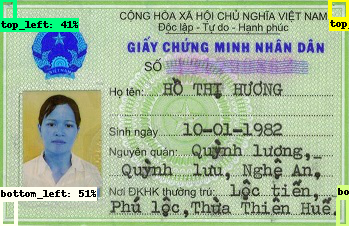

Done


In [45]:
category_index = label_map_util.create_category_index_from_labelmap('/content/CMND/label_map.pbtxt',
                                                                    use_display_name=True)
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))

image_path = "/content/CMND/flip.jpg"
#image = io.imread('/content/CMND/Dataset/CMND LE TUAN AN T.jpg')
#cv2_imshow(image)
print('Running inference for {}... '.format(image_path), end='')
image_np = load_image_into_numpy_array(image_path)

# Things to try:
# Flip horizontally
# image_np = np.fliplr(image_np).copy()

# Convert image to grayscale
# image_np = np.tile(
#     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)

#print(input_tensor)

detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

    # detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=200,
            min_score_thresh=.30,
            agnostic_mode=False)

plt.figure()
plt.imshow(image_np_with_detections)
plt.show()
cv2_imshow(image_np_with_detections)
print('Done')


# sphinx_gallery_thumbnail_number = 2
